In [4]:
#librarries
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

#%pip install statannot
from statannot import add_stat_annotation

#%pip install utils
from utils import * # for some functions used in barplotify and annotation for stats

%pip install statannotations

from statannotations.Annotator import Annotator

from scipy import stats
from scikit_posthocs import posthoc_dunn
from scikit_posthocs import posthoc_tukey

# calculate the spearman's correlation between two variables
from numpy.random import rand
from numpy.random import seed


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn>=0.9.0 in c:\users\me1009\anaconda3\lib\site-packages (from statannotations) (0.11.2)



In [5]:
df_ch= pd.read_csv("Christian_DEFAULT_RLH.csv")
df_dan= pd.read_csv("Daniel__DEFAULT_NYF.csv")

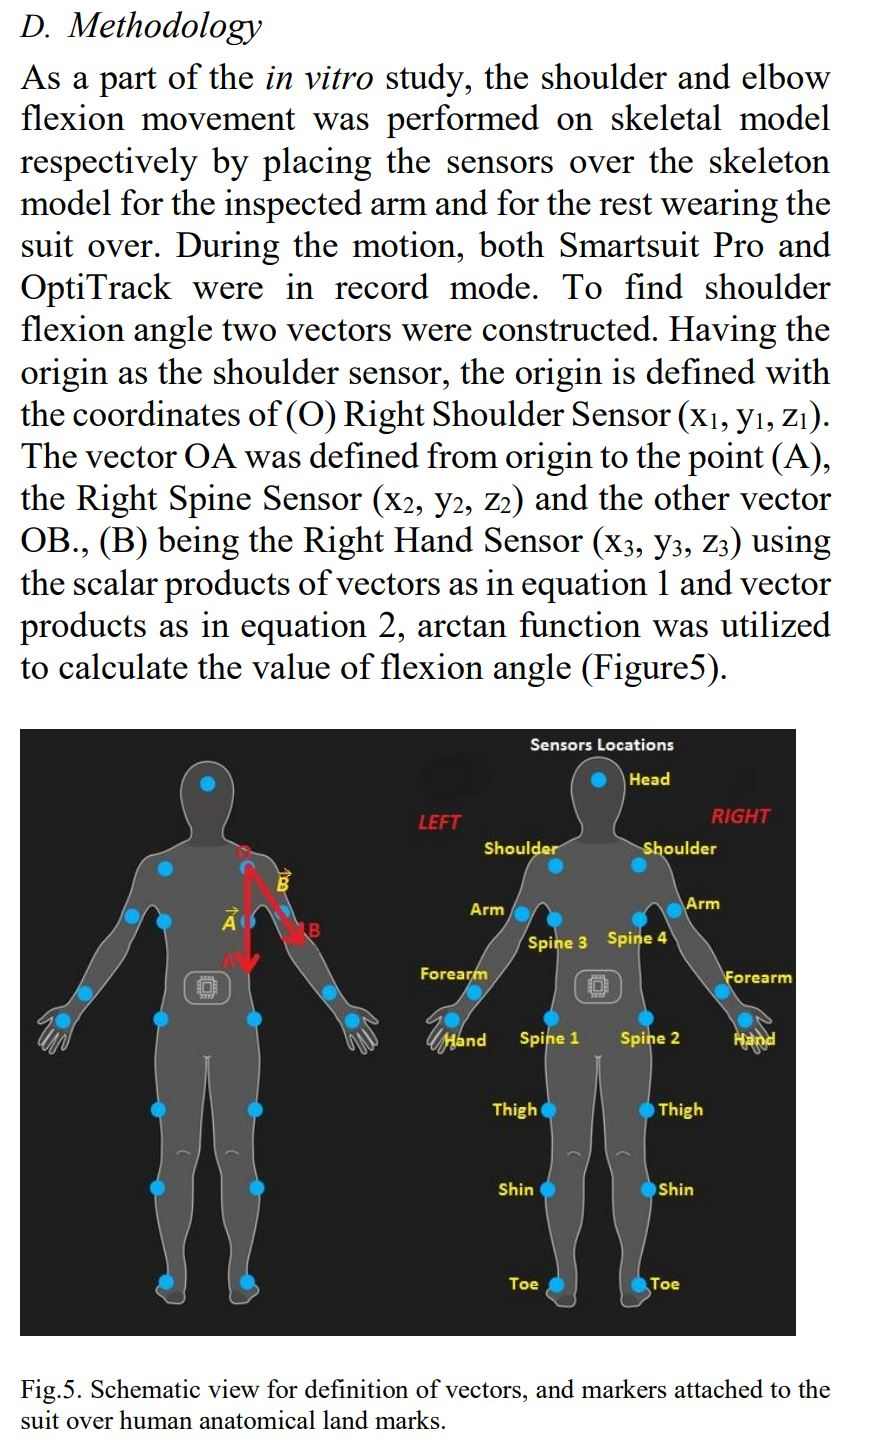

In [6]:
# angles in rokoko
from IPython.display import Image
Image("angles_rokoko.JPG", width=2, height=10)

# Variables
1- percentage of time when the wrist height was lower than the elbow height (PTW)
2- the height of the elbow/wrist relative to the armrest




# Visualizing snesors locations - control check

In [7]:
# get sensors positions for a moment
x= pd.DataFrame(df_ch.loc[0, [c for c in df_ch.columns if "_x" in c]])
x.columns= ["x"]
y= pd.DataFrame(df_ch.loc[0, [c for c in df_ch.columns if "_y" in c]])
y.columns= ["y"]

z= pd.DataFrame(df_ch.loc[0, [c for c in df_ch.columns if "_z" in c]])
z.columns= ["z"]

In [8]:
x_l= x.x.tolist()
y_l= y.y.to_list()
z_l=z.z.to_list()

In [9]:
x_y_temp= pd.DataFrame(list(zip(x_l, y_l, z_l)), columns=["x", "y", "z"])

<AxesSubplot:xlabel='x', ylabel='y'>

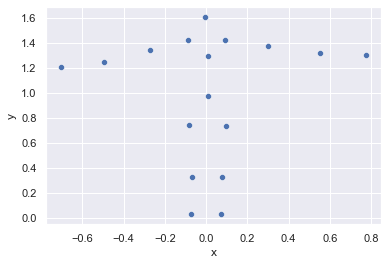

In [10]:
sns.scatterplot(x= "x", y="y", data=x_y_temp)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_y_temp.z, x_y_temp.x, x_y_temp.y)

# Comparing Flextion/Abudcation angles
##################################################

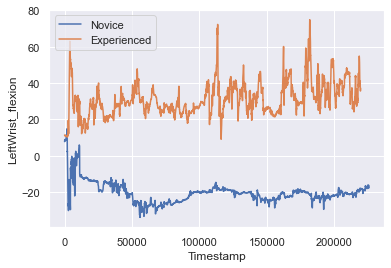

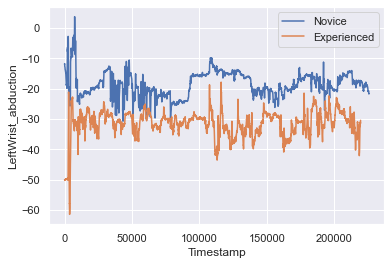

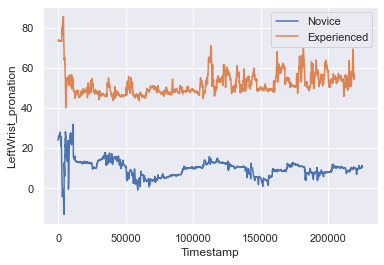

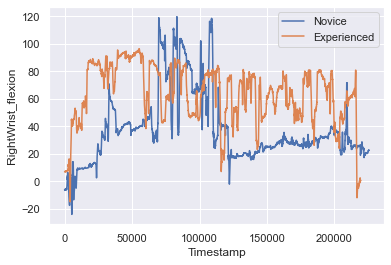

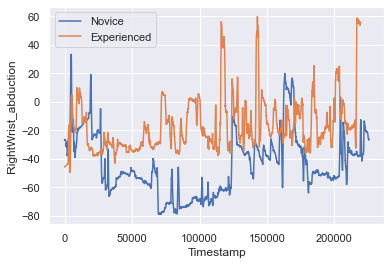

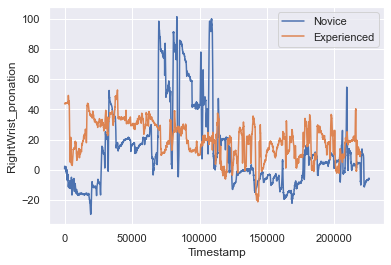

In [11]:
# Wrist data

for i in [col for col in df_ch if "Wrist" in col]:

    sns.lineplot( y=df_ch[i], x= df_ch["Timestamp"], label= "Novice")
    sns.lineplot( y=df_dan[i], x= df_ch["Timestamp"] , label= "Experienced")
    plt.show()

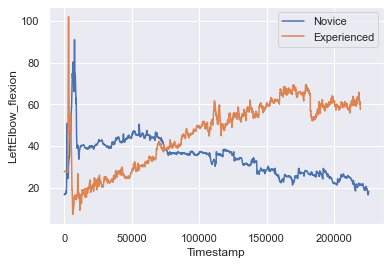

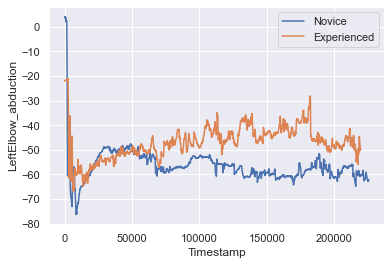

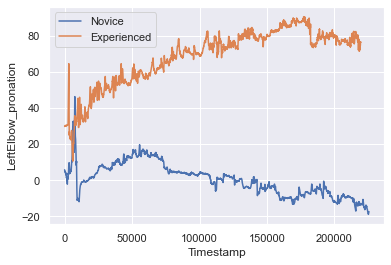

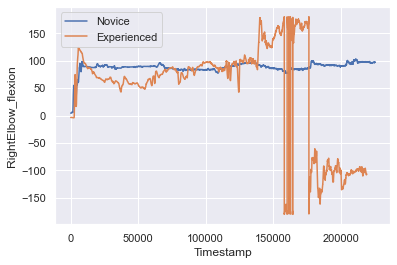

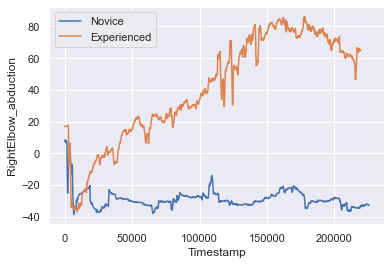

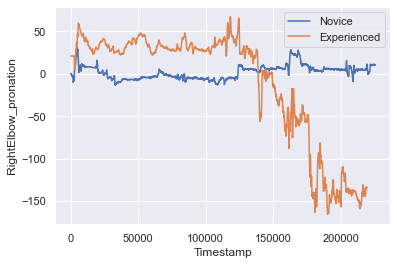

In [12]:
# Elbow data
for i in [col for col in df_ch if "Elbow" in col]:

    sns.lineplot( y=df_ch[i], x= df_ch["Timestamp"], label= "Novice")
    sns.lineplot( y=df_dan[i], x= df_ch["Timestamp"] , label= "Experienced")
    plt.show()

# Spectrums
###########################################

In [13]:
wrist_novice= pd.DataFrame(df_ch.loc[:, [c for c in df_ch.columns if "Wrist" in c]])
left_wrist_novice= wrist_novice["LeftWrist_flexion"]

wrist_experienced = pd.DataFrame(df_dan.loc[:, [c for c in df_ch.columns if "Wrist" in c]])
left_wrist_experienced = wrist_experienced["LeftWrist_flexion"]

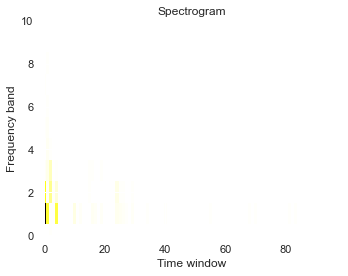

In [14]:

from scipy import signal
freqs, times, spectrogram = signal.spectrogram(left_wrist_novice)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.ylim(0,10)
plt.xlabel('Time window')
plt.tight_layout()

# Power Spectral Density
##################################################

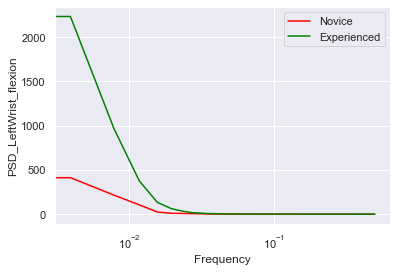

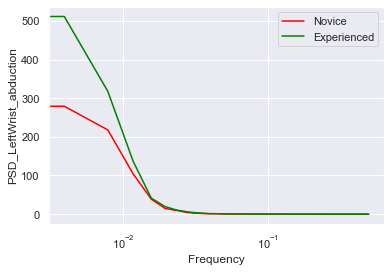

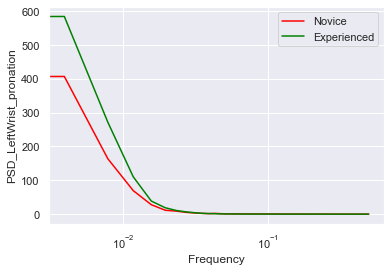

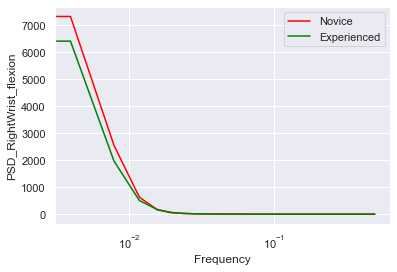

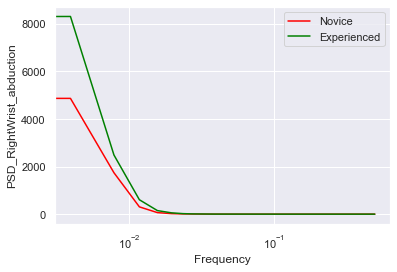

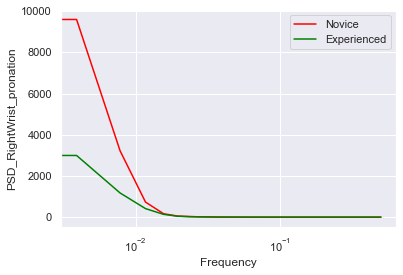

In [15]:
# Wrist data
wrist_novice= pd.DataFrame(df_ch.loc[:, [c for c in df_ch.columns if "Wrist" in c]])
wrist_experienced = pd.DataFrame(df_dan.loc[:, [c for c in df_ch.columns if "Wrist" in c]])

def psd_plotify(sig_noice, sig_exper):
    for c in sig_noice.columns:
        temp_novice= sig_noice[c]
        temp_exper= sig_exper[c]
        freqs_nov, psd_nov = signal.welch(temp_novice)
        freqs_exper, psd_exper = signal.welch(temp_exper)
        plt.semilogx(freqs_nov, psd_nov, color="red",  label="novice" )
        plt.semilogx(freqs_exper, psd_exper, color="green",  label="expert")
        plt.ylabel  ("PSD_"+ c)
        plt.xlabel("Frequency")
        legend_drawn_flag = True
        plt.legend(["Novice", "Experienced"], loc=0, frameon=legend_drawn_flag)
        plt.show()

psd_plotify(wrist_novice, wrist_experienced)

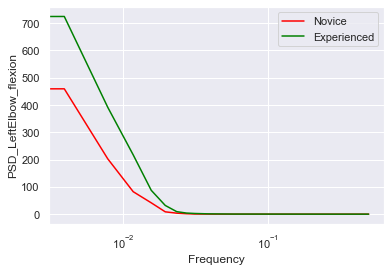

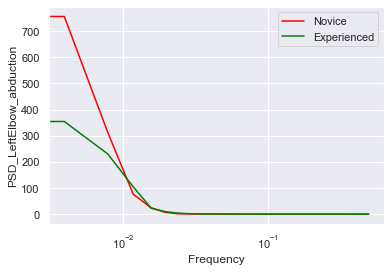

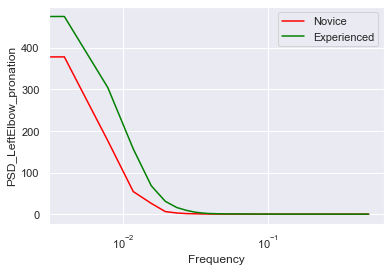

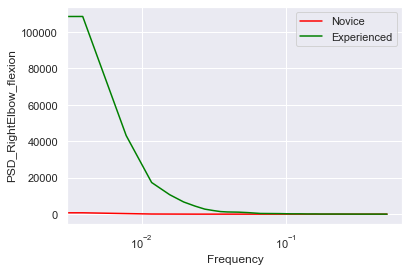

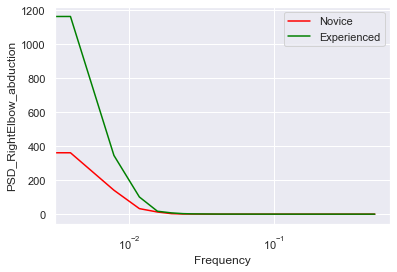

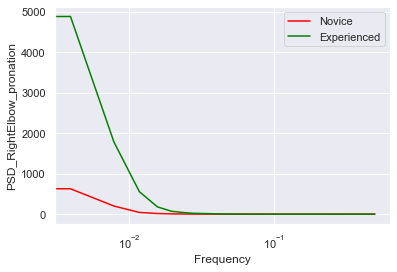

In [16]:

# Shoulder data
elbow_novice= pd.DataFrame(df_ch.loc[:, [c for c in df_ch.columns if "Elbow" in c]])
elbow_experienced = pd.DataFrame(df_dan.loc[:, [c for c in df_ch.columns if "Elbow" in c]])

psd_plotify(elbow_novice, elbow_experienced)

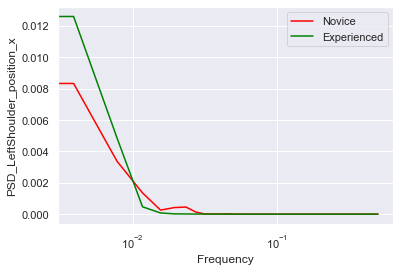

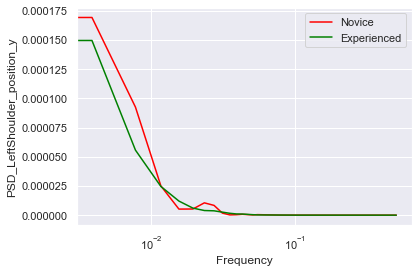

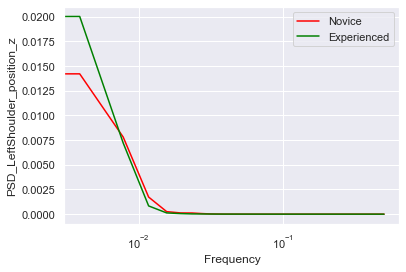

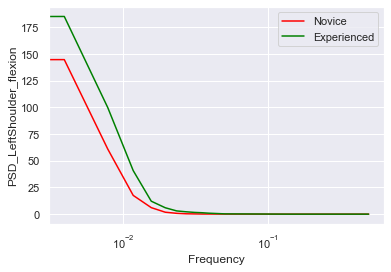

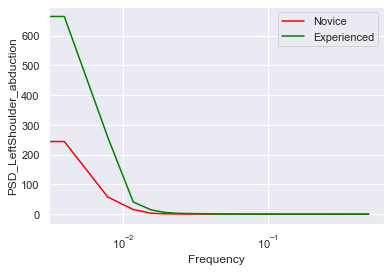

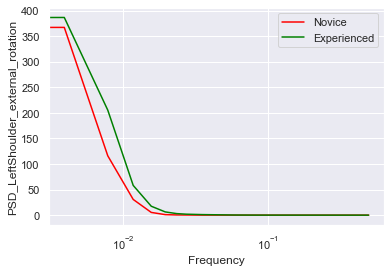

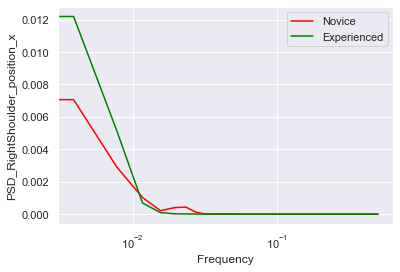

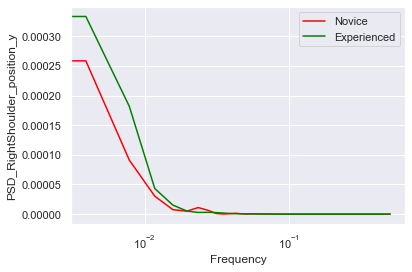

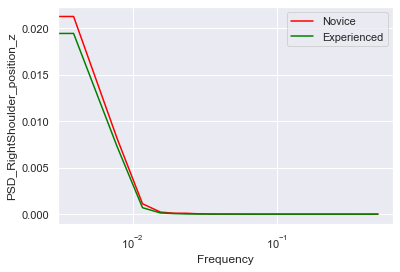

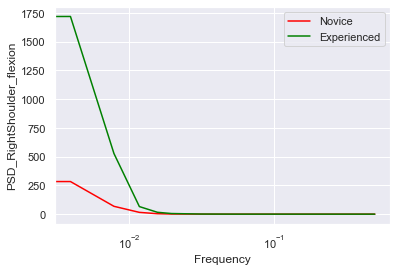

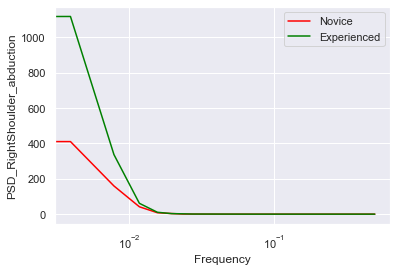

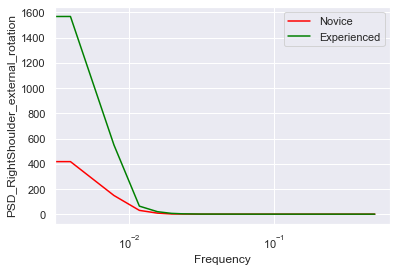

In [17]:
# Shoulder data
shoulder_novice= pd.DataFrame(df_ch.loc[:, [c for c in df_ch.columns if "Shoulder" in c]])
shoulder_experienced = pd.DataFrame(df_dan.loc[:, [c for c in df_ch.columns if "Shoulder" in c]])

psd_plotify(shoulder_novice, shoulder_experienced)

# Speed and Acc of Angles

In [18]:
# speed of angles per second
shoulder_novice= pd.DataFrame(df_ch.loc[:, [c for c in df_ch.columns if "Shoulder" in c]])
#shoulder_experienced = pd.DataFrame(df_dan.loc[:, [c for c in df_ch.columns if "Shoulder" in c]])
#shoulder_novice["diff_LeftShoulder_flexion"]= abs(shoulder_novice["LeftShoulder_flexion"].diff())

#get miliseconds
shoulder_novice["Time_ms"]= pd.to_timedelta(df_ch["Timestamp"], unit="ms")
# get second (based on sampling rate)
shoulder_novice["Time_s"]= shoulder_novice["Time_ms"].dt.floor("S")
#shoulder_novice["Time_s_only"]= shoulder_novice["Time_s"].dt.total_seconds()
temp= pd.DataFrame(shoulder_novice.groupby("Time_s")[["LeftShoulder_flexion"]].agg(lambda x: abs(x.astype(float).mean()))).reset_index()
temp.columns= ["Time_s", "Average_Angle_Per_Sec"]
temp["Speed_Angle_Per_Sec"]= abs(temp["Average_Angle_Per_Sec"].diff())
temp["Accel_Angle_Per_Sec"]= abs(temp["Speed_Angle_Per_Sec"].diff())

In [19]:
shoulder_exper= pd.DataFrame(df_dan.loc[:, [c for c in df_dan.columns if "Shoulder" in c]])
#shoulder_experienced = pd.DataFrame(df_dan.loc[:, [c for c in df_ch.columns if "Shoulder" in c]])
#shoulder_novice["diff_LeftShoulder_flexion"]= abs(shoulder_novice["LeftShoulder_flexion"].diff())

#get miliseconds
shoulder_exper["Time_ms"]= pd.to_timedelta(df_dan["Timestamp"], unit="ms")
# get second (based on sampling rate)
shoulder_exper["Time_s"]= shoulder_exper["Time_ms"].dt.floor("S")
#shoulder_novice["Time_s_only"]= shoulder_novice["Time_s"].dt.total_seconds()
temp1= pd.DataFrame(shoulder_exper.groupby("Time_s")[["LeftShoulder_flexion"]].agg(lambda x: abs(x.astype(float).mean()))).reset_index()
temp1.columns= ["Time_s", "Average_Angle_Per_Sec"]
temp1["Speed_Angle_Per_Sec"]= abs(temp1["Average_Angle_Per_Sec"].diff())
temp1["Accel_Angle_Per_Sec"]= abs(temp1["Speed_Angle_Per_Sec"].diff())

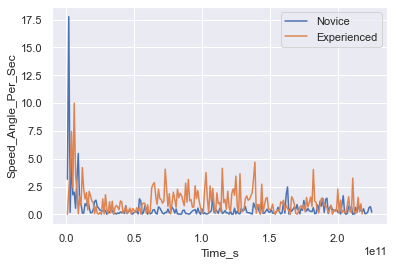

In [20]:
sns.lineplot( y=temp["Speed_Angle_Per_Sec"], x= temp["Time_s"], label= "Novice")
sns.lineplot( y=temp1["Speed_Angle_Per_Sec"], x= temp1["Time_s"], label= "Experienced")
plt.show()

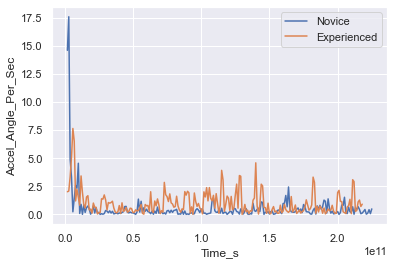

In [21]:
sns.lineplot( y=temp["Accel_Angle_Per_Sec"], x= temp["Time_s"], label= "Novice")
sns.lineplot( y=temp1["Accel_Angle_Per_Sec"], x= temp1["Time_s"], label= "Experienced")
plt.show()